In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.express as px
import plotly.io as pio
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [147]:
!pip install scikit-learn



In [148]:
df = pd.read_csv('alba_1.csv')
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06
5,Sub-Saharan Africa,South Africa,Beverages,Offline,H,7/10/2012,482292354,8/21/2012,9880,47.45,31.79,468806.00,314085.20,154720.80
6,Asia,Laos,Vegetables,Online,L,2/20/2011,844532620,3/20/2011,4825,154.06,90.93,743339.50,438737.25,304602.25
7,Asia,China,Baby Food,Online,C,4/10/2017,564251220,5/12/2017,3330,255.28,159.42,850082.40,530868.60,319213.80
8,Sub-Saharan Africa,Eritrea,Meat,Online,L,11/21/2014,411809480,1/10/2015,2431,421.89,364.69,1025614.59,886561.39,139053.20
9,Central America and the Caribbean,Haiti,Office Supplies,Online,C,7/4/2015,327881228,7/20/2015,6197,651.21,524.96,4035548.37,3253177.12,782371.25


In [149]:
print(df.info())
print(df.describe())

print(df.isnull().sum())

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Profit Margin'] = df['Total Profit'] / df['Total Revenue']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10000 non-null  object 
 1   Country         10000 non-null  object 
 2   Item Type       10000 non-null  object 
 3   Sales Channel   10000 non-null  object 
 4   Order Priority  10000 non-null  object 
 5   Order Date      10000 non-null  object 
 6   Order ID        10000 non-null  int64  
 7   Ship Date       10000 non-null  object 
 8   Units Sold      10000 non-null  int64  
 9   Unit Price      10000 non-null  float64
 10  Unit Cost       10000 non-null  float64
 11  Total Revenue   10000 non-null  float64
 12  Total Cost      10000 non-null  float64
 13  Total Profit    10000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB
None
           Order ID    Units Sold    Unit Price     Unit Cost  Total Revenue  \
count  1.000000e+04  1000

In [150]:

print(df['Region'].value_counts())

print(df['Item Type'].value_counts())

Region
Europe                               2633
Sub-Saharan Africa                   2603
Asia                                 1469
Middle East and North Africa         1264
Central America and the Caribbean    1019
Australia and Oceania                 797
North America                         215
Name: count, dtype: int64
Item Type
Personal Care      888
Household          875
Clothes            872
Baby Food          842
Office Supplies    837
Vegetables         836
Cosmetics          834
Cereal             825
Snacks             816
Meat               798
Fruits             795
Beverages          782
Name: count, dtype: int64


In [151]:
!pip install scikit-learn



In [152]:
grouped = df.groupby('Region', as_index=False)['Total Profit'].sum()
print(grouped)

                              Region  Total Profit
0                               Asia  5.874033e+08
1              Australia and Oceania  3.240712e+08
2  Central America and the Caribbean  4.033578e+08
3                             Europe  1.027000e+09
4       Middle East and North Africa  5.099239e+08
5                      North America  9.949552e+07
6                 Sub-Saharan Africa  9.996421e+08


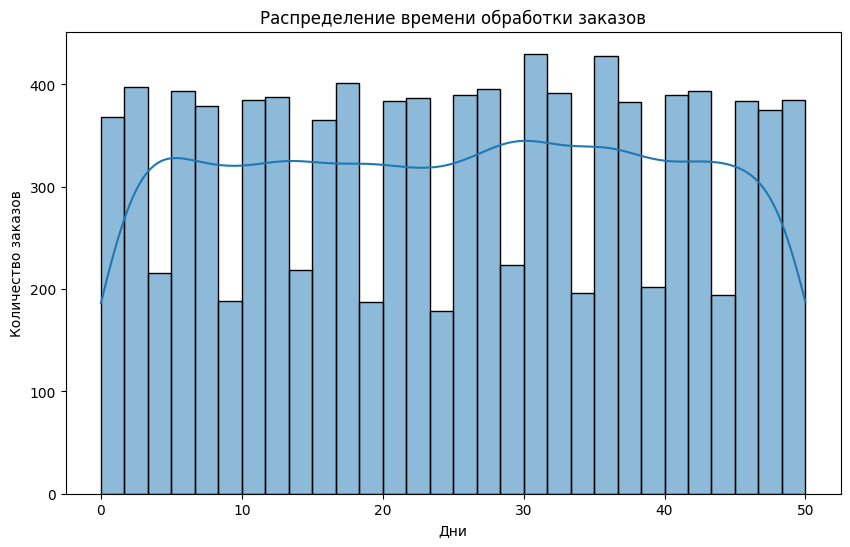

In [153]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Processing Time'], bins=30, kde=True)
plt.title('Распределение времени обработки заказов')
plt.xlabel('Дни')
plt.ylabel('Количество заказов')
plt.show()

In [154]:
top_5_margin = df.groupby('Item Type')['Profit Margin'].mean().sort_values(ascending=False).head(5)

fig = px.bar(top_5_margin, x=top_5_margin.index, y=top_5_margin.values,
             labels={'x': 'Item Type', 'y': 'Average Profit Margin'},
             title='Top 5 Most Profitable Product Categories')

fig.write_html('top_5_profit_margin.html')


In [162]:
fig = px.histogram(df, x='Processing Time', nbins=30, marginal='violin', 
                   title='Распределение времени обработки заказов', 
                 )

fig.update_layout(bargap=0.1)

fig.write_html('pope.html')


In [158]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Распределение времени обработки заказов
fig1 = px.histogram(df, x='Processing Time', nbins=30, 
                   title='Распределение времени обработки заказов',
                   labels={'Processing Time': 'Дни обработки'},
                   color_discrete_sequence=['#636EFA'])
fig1.update_layout(bargap=0.1)
fig1.write_html('1.html')

# 2. Анализ прибыли по регионам
fig2 = px.box(df, x='Region', y='Total Profit', 
             title='Распределение прибыли по регионам',
             color='Region')
fig2.update_layout(xaxis_title='Регион', yaxis_title='Прибыль')
fig2.write_html('2.html')





In [157]:
# Расчет матрицы корреляций
corr_matrix = df.select_dtypes(include=[np.number]).corr()

fig6 = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,  # Значения корреляций
    x=corr_matrix.columns,  # Названия столбцов по X
    y=corr_matrix.columns,  # Названия строк по Y
    colorscale='RdBu',  # Красно-синяя шкала
    zmin=-1,  # Минимальное значение
    zmax=1,  # Максимальное значение
    hoverongaps=False  # Показывать подсказки
))
fig6.update_layout(title='Матрица корреляций числовых показателей')
# fig6.write_html('6.html')
fig6.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:

# Сравним Sub-Saharan Africa и Europe
africa_profit = df[df['Region'] == 'Sub-Saharan Africa']['Total Profit']
europe_profit = df[df['Region'] == 'Europe']['Total Profit']

t_stat, p_val = ttest_ind(africa_profit, europe_profit)
print(f"T-статистика: {t_stat:.4f}, p-значение: {p_val:.4f}")

T-статистика: -0.5821, p-значение: 0.5606


Коэффициент X:  0.2629749698274155
Свободный член (intercept): 148348.9308926527
R²: 0.6370
MAE: 174915.82
MSE: 51732730242.11


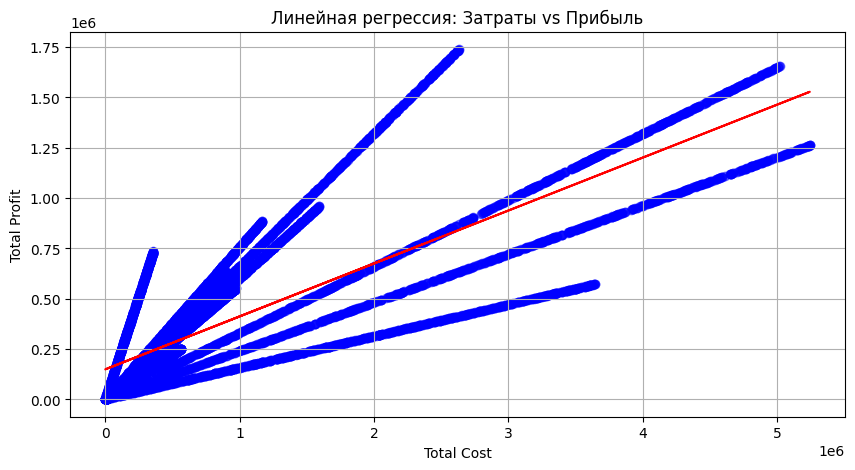

In [ ]:


# Подготовка данных
X = df[['Total Cost']]  # Используем общие затраты как предиктор
y = df['Total Profit']  # Прогнозируем общую прибыль

# Создание и обучение модели
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Оценка модели
print('Коэффициент X: ', model.coef_[0])
print('Свободный член (intercept):', model.intercept_)
print(f'R²: {r2_score(y, y_pred):.4f}')
print(f'MAE: {mean_absolute_error(y, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y, y_pred):.2f}')

# Визуализация
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, y_pred, color='red')
plt.xlabel('Total Cost')
plt.ylabel('Total Profit')
plt.title('Линейная регрессия: Затраты vs Прибыль')
plt.grid()
plt.show()

# Интерактивная визуализация с Plotly
fig34 = px.scatter(df, x='Total Cost', y='Total Profit', 
                 trendline="ols", 
                 title='Зависимость прибыли от затрат',
                 labels={'Total Cost': 'Общие затраты', 'Total Profit': 'Общая прибыль'})
fig34.write_html('krasivo_delaesh_durak.html')

In [ ]:
fig = plt.box(df, x='Region', y='Total Profit', 
             title='Распределение прибыли по регионам')
fig.show()

TypeError: box() got an unexpected keyword argument 'x'

In [ ]:
import plotly.figure_factory as ff
# Выбираем числовую переменную для теста (например, прибыль)
data = df["Total Profit"]

# Расчет квантилей для нормального распределения
qq = stats.probplot(data, dist="norm")

# Построение графика Q-Q в Plotly
fig_qq = ff.create_scatterplotmatrix([qq[0][0], qq[0][1]], diag='histogram', colormap=['#636EFA'], 
                                     title="Q-Q Plot: Проверка нормальности прибыли")
fig_qq.write_html("qq_plot.html")

PlotlyError: Dataframe not inputed. Please use a pandas dataframe to produce a scatterplot matrix.